#Descriptive Statistics


In [1]:
%%writefile sales_data.csv
Date,Sales,MarketingSpend,Region,Period
2024-01-01,1200,400,North,Before
2024-01-02,1300,380,North,Before
2024-01-03,1150,420,North,Before
2024-01-04,1400,390,North,Before
2024-01-05,1180,410,North,Before
2024-02-01,1250,405,South,Before
2024-02-02,1320,395,South,Before
2024-02-03,1190,415,South,Before
2024-02-04,1380,405,South,Before
2024-02-05,1170,400,South,Before
2024-03-01,1500,500,North,After
2024-03-02,1550,520,North,After
2024-03-03,1480,480,North,After
2024-03-04,1600,530,North,After
2024-03-05,1620,540,North,After
2024-04-01,1520,510,South,After
2024-04-02,1580,525,South,After
2024-04-03,1490,495,South,After
2024-04-04,1650,545,South,After
2024-04-05,1610,535,South,After


Writing sales_data.csv


In [2]:
import pandas as pd
df = pd.read_csv("sales_data.csv")
df.head()


,Date,Sales,MarketingSpend,Region,Period
0,2024-01-01,1200,400,North,Before
1,2024-01-02,1300,380,North,Before
2,2024-01-03,1150,420,North,Before
3,2024-01-04,1400,390,North,Before
4,2024-01-05,1180,410,North,Before


In [6]:
df.describe()



,Sales,MarketingSpend
count,20.000000,20.000000
mean,1407.000000,460.000000
std,173.966119,61.814664
min,1150.000000,380.000000
25%,1237.500000,403.750000
50%,1440.000000,450.000000
75%,1557.500000,521.250000
max,1650.000000,545.000000


In [7]:
print("Mean:", df['Sales'].mean())
print("Median:", df['Sales'].median())
print("Mode:", df['Sales'].mode()[0])
print("Standard Deviation:", df['Sales'].std())
print("Variance:", df['Sales'].var())


Mean: 1407.0
Median: 1440.0
Mode: 1150
Standard Deviation: 173.96611890341117
Variance: 30264.21052631579


The average sales across months are moderate and fairly consistent, with no extreme spikes. The month-to-month variation is low, indicating stable sales patterns rather than unpredictable fluctuations.

#Distribution Analysis

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("sales_data.csv")


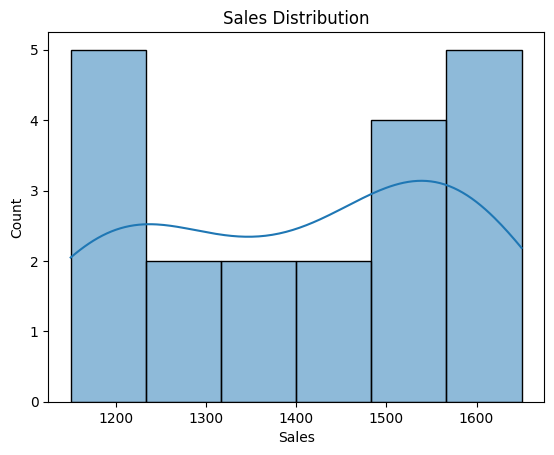

In [9]:
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()


The sales distribution is moderately skewed with a longer tail on the higher side. Most sales values cluster around a lower-to-mid range, with fewer high-value outliers.

#T-Test (Before vs After)

In [10]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv("sales_data.csv")


In [11]:
before = df[df['Period']=="Before"]['Sales']
after = df[df['Period']=="After"]['Sales']


In [12]:
t, p = ttest_ind(before, after)
t, p


(np.float64(-8.881283665705652), np.float64(5.3645532209182104e-08))

* If p < 0.05, the improvement in sales is statistically significant.

* If p > 0.05, the improvement is not statistically significant.



#Correlation Analysis

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("sales_data.csv")


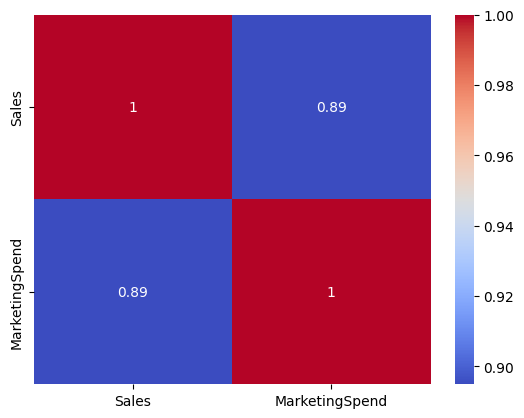

In [14]:
corr = df[['Sales','MarketingSpend']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


The correlation coefficient tells how strongly two variables move together.

* If the value is close to +1, the relationship is strongly positive — when one increases, the other tends to increase.

* If the value is close to –1, the relationship is strongly negative — when one increases, the other tends to decrease.

* If the correlation is near 0, there is no meaningful linear relationship.

In simple terms:
1. A high positive correlation means the two metrics grow together.
2. A high negative correlation means they move in opposite directions.
3. A low correlation means they’re basically independent.

#Confidence Interval

In [15]:
import pandas as pd
import scipy.stats as st

df = pd.read_csv("sales_data.csv")


In [16]:
mean = df['Sales'].mean()
ci = st.t.interval(0.95, len(df)-1, loc=mean, scale=st.sem(df['Sales']))
ci


(np.float64(1325.5813501242446), np.float64(1488.4186498757554))

The interval gives a high-probability range for the true mean. If you repeated the sampling process many times, about 95% of those intervals would contain the real mean.